<a href="https://colab.research.google.com/github/carolinewan/3m-data-assignment-1.1/blob/main/SGJobData_1Nov2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Please replace 'your_file_path' with the actual path to your CSV file in Google Drive
df = pd.read_csv('/content/drive/MyDrive/SGJobData.csv')

display(df.head())

Mounted at /content/drive


,categories,employmentTypes,metadata_expiryDate,metadata_isPostedOnBehalf,metadata_jobPostId,metadata_newPostingDate,metadata_originalPostingDate,metadata_repostCount,metadata_totalNumberJobApplication,metadata_totalNumberOfView,...,numberOfVacancies,occupationId,positionLevels,postedCompany_name,salary_maximum,salary_minimum,salary_type,status_id,status_jobStatus,title
0,"[{""id"":13,""category"":""Environment / Health""},{...",Permanent,2023-05-08,False,MCF-2023-0252866,2023-04-08,2023-03-30,2,5,151,...,1,NaN,Executive,WORKSTONE PTE. LTD.,2800,2000,Monthly,0,Closed,Food Technologist - Clementi | Entry Level | U...
1,"[{""id"":21,""category"":""Information Technology""}]",Permanent,2023-05-08,False,MCF-2023-0273977,2023-04-08,2023-04-08,0,0,55,...,2,NaN,Executive,TRUST RECRUIT PTE. LTD.,5500,4000,Monthly,0,Closed,"Software Engineer (Fab Support) (Java, CIM, Up..."
2,"[{""id"":33,""category"":""Repair and Maintenance""}]",Full Time,2023-04-22,False,MCF-2023-0273994,2023-04-08,2023-04-08,0,7,99,...,1,NaN,Senior Executive,PU TIEN SERVICES PTE. LTD.,4600,3800,Monthly,0,Closed,Senior Technician
3,"[{""id"":21,""category"":""Information Technology""}]",Permanent,2023-05-08,False,MCF-2023-0273991,2023-04-08,2023-04-08,0,6,113,...,1,NaN,Senior Executive,TRUST RECRUIT PTE. LTD.,10000,5000,Monthly,0,Closed,"Senior .NET Developer (.NET Core, MVC, MVVC, S..."
4,"[{""id"":2,""category"":""Admin / Secretarial""}]",Full Time,2023-05-08,False,MCF-2023-0273976,2023-04-08,2023-04-08,0,3,99,...,3,NaN,Non-executive,EATZ CATERING SERVICES PTE. LTD.,3400,2400,Monthly,0,Closed,Sales / Admin Cordinator


In [ ]:
display(df.tail())

,categories,employmentTypes,metadata_expiryDate,metadata_isPostedOnBehalf,metadata_jobPostId,metadata_newPostingDate,metadata_originalPostingDate,metadata_repostCount,metadata_totalNumberJobApplication,metadata_totalNumberOfView,...,numberOfVacancies,occupationId,positionLevels,postedCompany_name,salary_maximum,salary_minimum,salary_type,status_id,status_jobStatus,title
1048570,"[{""id"":5,""category"":""Banking and Finance""},{""i...",Full Time,2024-06-12,False,MCF-2024-0783841,2024-05-29,2024-05-29,0,1,10,...,1,NaN,Professional,UBS AG,20800,13300,Monthly,0,Open,Senior Technical Delivery/Transition Manager a...
1048571,"[{""id"":24,""category"":""Logistics / Supply Chain...",Temporary,2024-06-05,False,MCF-2024-0783839,2024-05-29,2024-05-29,0,0,0,...,1,NaN,Executive,RECRUITPEDIA PTE. LTD.,5000,3500,Monthly,0,Open,Supply Chain Coordinator (6 Months Contract) /...
1048572,"[{""id"":6,""category"":""Building and Construction""}]",Contract,2024-06-28,False,MCF-2024-0783846,2024-05-29,2024-05-29,0,1,2,...,2,NaN,Executive,RECRUIT EXPRESS PTE LTD,4500,3000,Monthly,0,Open,3 Months Contract to 1 Year Contract Facilitie...
1048573,"[{""id"":35,""category"":""Sales / Retail""}]",Full Time,2024-06-28,False,MCF-2024-0783852,2024-05-29,2024-05-29,0,0,0,...,3,NaN,Executive,RECRUITPEDIA PTE. LTD.,3000,2500,Monthly,0,Open,Senior Sales Associate / Central / jewelry and...
1048574,"[{""id"":11,""category"":""Engineering""},{""id"":18,""...",Full Time,2024-06-28,False,MCF-2024-0783866,2024-05-29,2024-05-29,0,0,0,...,1,NaN,Senior Executive,RECRUITPEDIA PTE. LTD.,8500,6000,Monthly,0,Open,"Senior Energy Engineer (SCEM) - West, Global MNC"


In [ ]:
print("Number of rows:", df.shape[0])

Number of rows: 1048575


In [ ]:
def extract_category_info(category_list_str):
    if pd.isna(category_list_str):
        return None, None
    # Use regex to find all id and category pairs
    matches = re.findall(r'{"id":(\d+),"category":"([^"]+)"}', category_list_str)
    if matches:
        # Return the first found id and category
        return int(matches[0][0]), matches[0][1]
    return None, None

df['category_id'], df['category_name'] = zip(*df['categories'].apply(extract_category_info))

display(df[['categories', 'category_id', 'category_name']].head())

,categories,category_id,category_name
0,"[{""id"":13,""category"":""Environment / Health""},{...",13.0,Environment / Health
1,"[{""id"":21,""category"":""Information Technology""}]",21.0,Information Technology
2,"[{""id"":33,""category"":""Repair and Maintenance""}]",33.0,Repair and Maintenance
3,"[{""id"":21,""category"":""Information Technology""}]",21.0,Information Technology
4,"[{""id"":2,""category"":""Admin / Secretarial""}]",2.0,Admin / Secretarial


In [ ]:
unique_category_ids = df['category_id'].unique()
print("Unique Category IDs:")
display(unique_category_ids)

Unique Category IDs:


array([13., 21., 33.,  2.,  7., 37.,  1., 11., 15., 39.,  3., 26., 32.,
       41.,  8., 17.,  6., 16.,  4., 24.,  5., 20., 10., 14., 25., 18.,
       23., 35., 38.,  9., 29., 27., 28., 34., 31., 12., 42., 22., 19.,
       36., 43., 30., 40., nan])

In [ ]:
df_sorted_by_category = df.sort_values(by='category_id')
display(df_sorted_by_category.head())

,categories,employmentTypes,metadata_expiryDate,metadata_isPostedOnBehalf,metadata_jobPostId,metadata_newPostingDate,metadata_originalPostingDate,metadata_repostCount,metadata_totalNumberJobApplication,metadata_totalNumberOfView,...,positionLevels,postedCompany_name,salary_maximum,salary_minimum,salary_type,status_id,status_jobStatus,title,category_id,category_name
1048493,"[{""id"":1,""category"":""Accounting / Auditing / T...",Permanent,2024-06-27,False,MCF-2024-0776462,2024-05-28,2024-05-28,0,1,76,...,Manager,TEA EXPLORER PTE. LTD.,8500,7000,Monthly,0,Open,Financial Analyst Manager (Retail & Leasing),1.0,Accounting / Auditing / Taxation
1048492,"[{""id"":1,""category"":""Accounting / Auditing / T...",Contract,2024-06-18,False,MCF-2024-0776465,2024-05-28,2024-05-28,0,1,31,...,Executive,PERSOLKELLY SINGAPORE PTE. LTD.,4800,4200,Monthly,0,Open,"Finance Analyst | $4,800 | 6 Months Contract @...",1.0,Accounting / Auditing / Taxation
40,"[{""id"":1,""category"":""Accounting / Auditing / T...",Full Time,2023-05-08,False,MCF-2023-0274151,2023-04-08,2023-04-08,0,36,363,...,Fresh/entry level,VALENCY INTERNATIONAL PTE. LTD.,4000,3000,Monthly,0,Closed,Management Trainee,1.0,Accounting / Auditing / Taxation
812205,"[{""id"":1,""category"":""Accounting / Auditing / T...",Full Time,2024-03-30,False,MCF-2024-0302417,2024-02-29,2024-02-29,0,1,15,...,Executive,THE SINGAPORE RESORT & SPA,4500,4200,Monthly,0,Open,Accountant,1.0,Accounting / Auditing / Taxation
812270,"[{""id"":1,""category"":""Accounting / Auditing / T...",Full Time,2024-03-30,False,MCF-2024-0302303,2024-02-29,2024-02-29,0,1,10,...,Senior Executive,CHAN BROTHERS TRAVEL (PTE) LIMITED,5500,4500,Monthly,0,Open,Accountant,1.0,Accounting / Auditing / Taxation


In [ ]:
# Display column names and data types
print("Column Information:")
display(df.info())

# Display basic statistics for numerical columns
print("\nBasic Statistics:")
display(df.describe())

# Display the number of unique values in each column
print("\nUnique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   categories                          1044587 non-null  object 
 1   employmentTypes                     1044587 non-null  object 
 2   metadata_expiryDate                 1044587 non-null  object 
 3   metadata_isPostedOnBehalf           1048575 non-null  bool   
 4   metadata_jobPostId                  1044587 non-null  object 
 5   metadata_newPostingDate             1044587 non-null  object 
 6   metadata_originalPostingDate        1044587 non-null  object 
 7   metadata_repostCount                1048575 non-null  int64  
 8   metadata_totalNumberJobApplication  1048575 non-null  int64  
 9   metadata_totalNumberOfView          1048575 non-null  int64  
 10  minimumYearsExperience              1048575 non-null  int6

None


Basic Statistics:


,metadata_repostCount,metadata_totalNumberJobApplication,metadata_totalNumberOfView,minimumYearsExperience,numberOfVacancies,occupationId,salary_maximum,salary_minimum,status_id,category_id
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,0.0,1.048575e+06,1.048575e+06,1048575.0,1.044587e+06
mean,5.471807e-02,2.130168e+00,2.671861e+01,2.779147e+00,2.674786e+00,NaN,5.609414e+03,3.813629e+03,0.0,1.398803e+01
std,2.822564e-01,1.036667e+01,8.192188e+01,2.532014e+00,1.109244e+01,NaN,2.704667e+04,3.107354e+03,0.0,1.066014e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.0,1.000000e+00
25%,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,3.300000e+03,2.500000e+03,0.0,6.000000e+00
50%,0.000000e+00,0.000000e+00,4.000000e+00,2.000000e+00,1.000000e+00,NaN,4.500000e+03,3.000000e+03,0.0,1.100000e+01
75%,0.000000e+00,1.000000e+00,1.700000e+01,4.000000e+00,2.000000e+00,NaN,6.500000e+03,4.500000e+03,0.0,2.100000e+01
max,2.000000e+00,1.342000e+03,8.190000e+03,8.800000e+01,9.990000e+02,NaN,2.533000e+07,3.500000e+05,0.0,4.300000e+01



Unique Values per Column:
categories: 21125 unique values
employmentTypes: 8 unique values
metadata_expiryDate: 449 unique values
metadata_isPostedOnBehalf: 2 unique values
metadata_jobPostId: 1044587 unique values
metadata_newPostingDate: 429 unique values
metadata_originalPostingDate: 603 unique values
metadata_repostCount: 3 unique values
metadata_totalNumberJobApplication: 369 unique values
metadata_totalNumberOfView: 1543 unique values
minimumYearsExperience: 47 unique values
numberOfVacancies: 98 unique values
occupationId: 0 unique values
positionLevels: 9 unique values
postedCompany_name: 53151 unique values
salary_maximum: 2611 unique values
salary_minimum: 2128 unique values
salary_type: 1 unique values
status_id: 1 unique values
status_jobStatus: 3 unique values
title: 377084 unique values
category_id: 43 unique values
category_name: 43 unique values


The general question: how was the job market in Singapore?
Which sector/role was trending up?
Which sector/role was trending down?
Which were the top paid sectors/roles?

In [ ]:
#The general question: how was the job market in Singapore?



#The general question: how was the job market in Singapore?

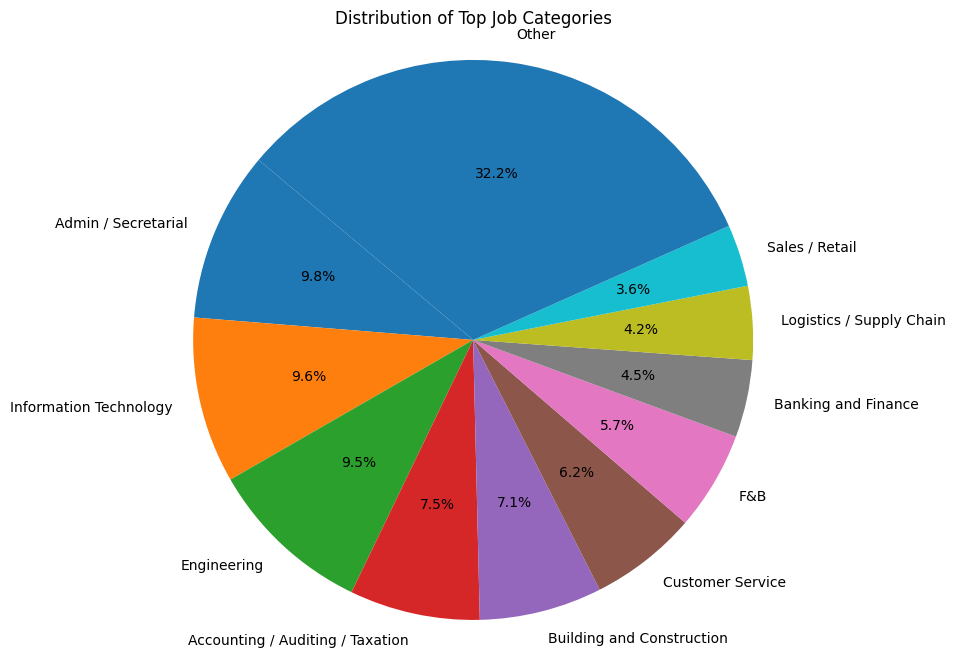

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['category_name'].value_counts()

# Select the top N categories to avoid overcrowding the pie chart
top_n = 10
top_categories = category_counts.head(top_n)
other_count = category_counts[top_n:].sum()

# Create data for the pie chart
if other_count > 0:
    sizes = top_categories.tolist() + [other_count]
    labels = top_categories.index.tolist() + ['Other']
else:
    sizes = top_categories.tolist()
    labels = top_categories.index.tolist()

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top Job Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
df['metadata_newPostingDate'] = pd.to_datetime(df['metadata_newPostingDate'], errors='coerce')
df['posting_month_year'] = df['metadata_newPostingDate'].dt.to_period('M')

# Group by month/year and category, and count the occurrences
job_trends = df.groupby(['posting_month_year', 'category_name']).size().reset_index(name='job_count')

display(job_trends.head())

,posting_month_year,category_name,job_count
0,2023-03,Accounting / Auditing / Taxation,780
1,2023-03,Admin / Secretarial,974
2,2023-03,Advertising / Media,143
3,2023-03,Architecture / Interior Design,133
4,2023-03,Banking and Finance,473


Feng | Skills Union


🧩 1. Job Market Trends & Demand Analysis
Scenario: “You’re an analyst at a workforce planning agency. Management wants to know which skills and roles are in highest demand across regions.”

📈 2. Salary Analysis & Market Benchmarking
Scenario: “Your client is an HR consulting firm benchmarking salaries for different roles and skills.”

🧠 3. Skills Gap & Training Needs
Scenario: “A government workforce agency wants to identify which skills are most in demand but least common among job seekers.”

🏙️ 4. Regional Labor Market Insights
Scenario: “A policy maker wants to understand which cities or regions have the most job growth and which are declining.”

🤖 5. Job Recommendation or Career Path Modeling
Scenario: “You work at a career platform and want to recommend jobs based on user skills.”

🧮 6. Company Hiring Behavior & Industry Dynamics
Scenario: “Your client is an investor analyzing which companies are hiring aggressively in tech.”


🧩 1. Job Market Trends & Demand Analysis Scenario: “You’re an analyst at a workforce planning agency. Management wants to know which skills and roles are in highest demand across regions.”

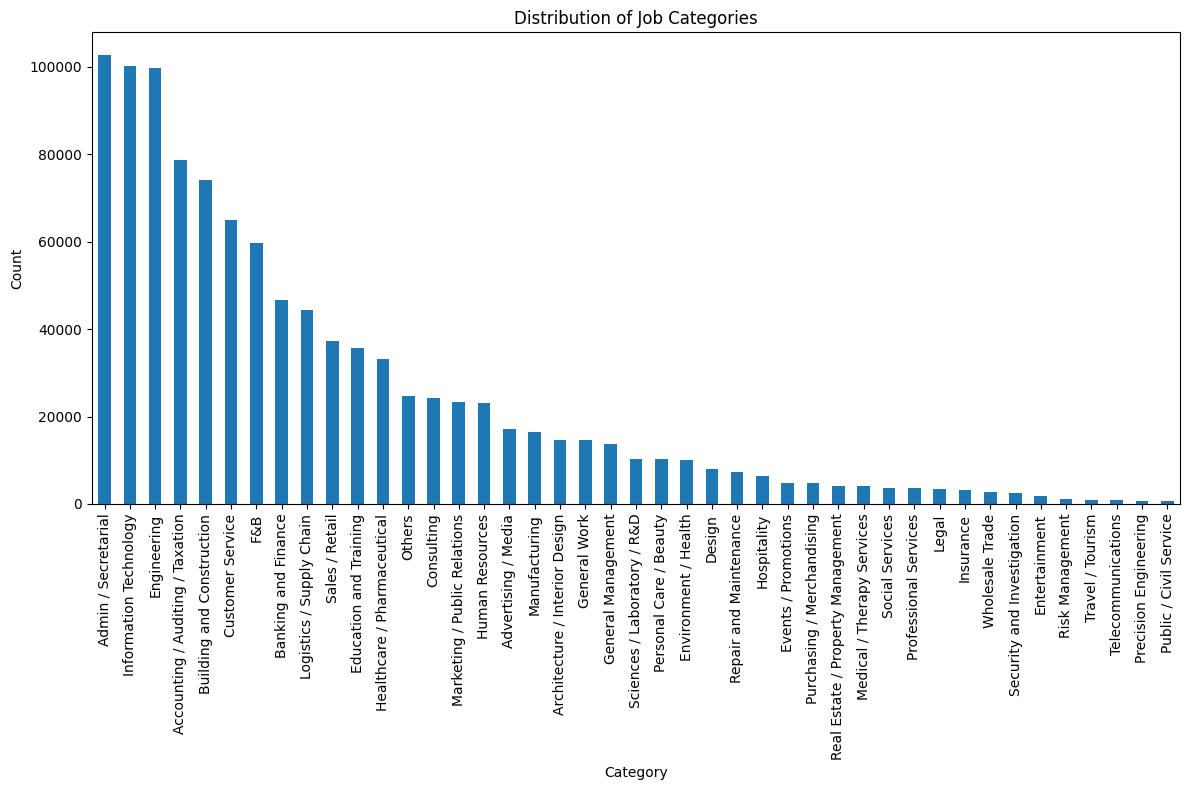

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['category_name'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 8))
category_counts.plot(kind='bar')
plt.title('Distribution of Job Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

📈 2. Salary Analysis & Market Benchmarking Scenario: “Your client is an HR consulting firm benchmarking salaries for different roles and skills.”

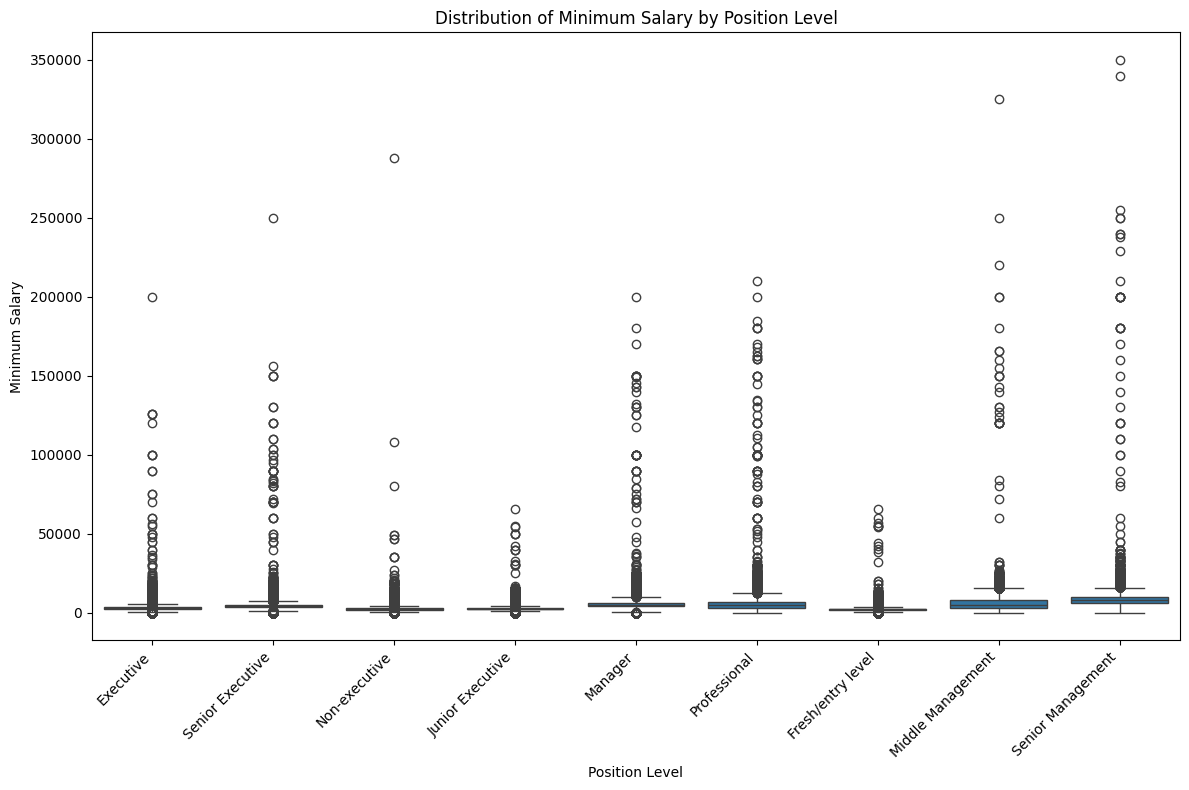

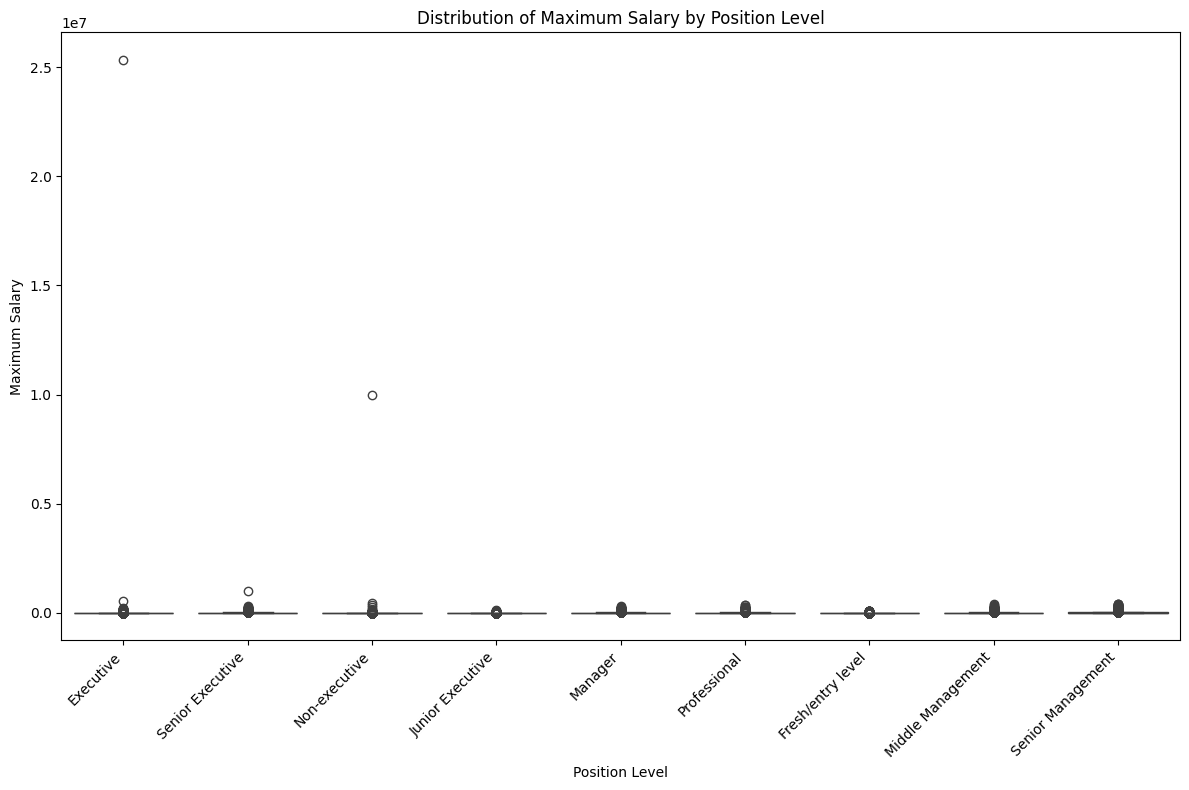

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for salary_minimum by position level
plt.figure(figsize=(12, 8))
sns.boxplot(x='positionLevels', y='salary_minimum', data=df)
plt.title('Distribution of Minimum Salary by Position Level')
plt.xlabel('Position Level')
plt.ylabel('Minimum Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Box plot for salary_maximum by position level
plt.figure(figsize=(12, 8))
sns.boxplot(x='positionLevels', y='salary_maximum', data=df)
plt.title('Distribution of Maximum Salary by Position Level')
plt.xlabel('Position Level')
plt.ylabel('Maximum Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

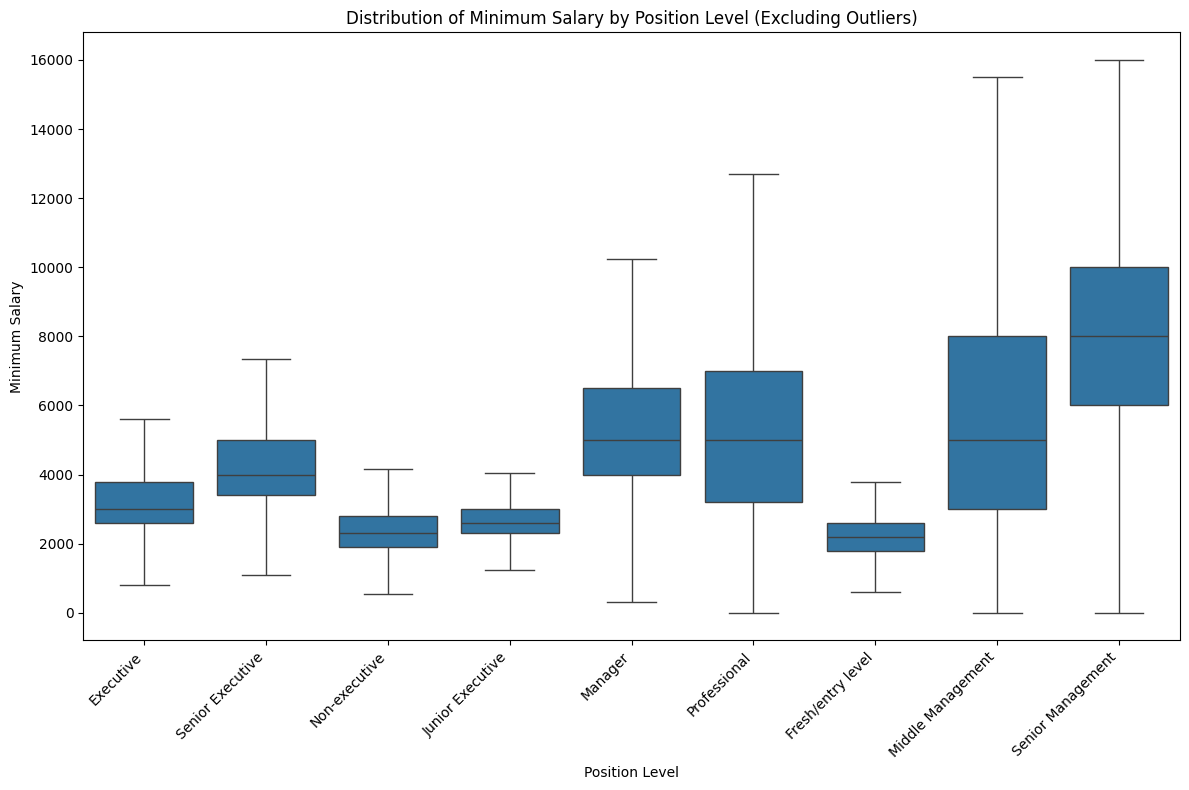

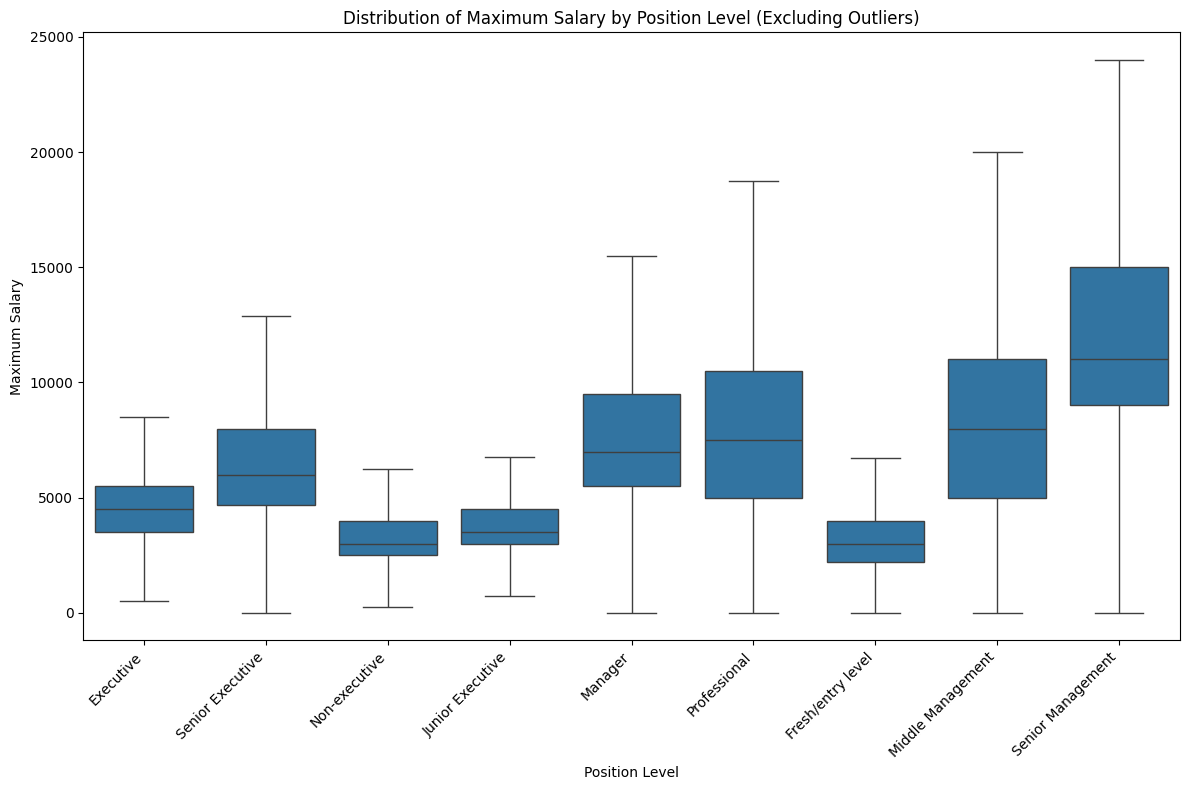

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for salary_minimum by position level (excluding outliers)
plt.figure(figsize=(12, 8))
sns.boxplot(x='positionLevels', y='salary_minimum', data=df, showfliers=False)
plt.title('Distribution of Minimum Salary by Position Level (Excluding Outliers)')
plt.xlabel('Position Level')
plt.ylabel('Minimum Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Box plot for salary_maximum by position level (excluding outliers)
plt.figure(figsize=(12, 8))
sns.boxplot(x='positionLevels', y='salary_maximum', data=df, showfliers=False)
plt.title('Distribution of Maximum Salary by Position Level (Excluding Outliers)')
plt.xlabel('Position Level')
plt.ylabel('Maximum Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

🧠 3. Skills Gap & Training Needs Scenario: “A government workforce agency wants to identify which skills are most in demand but least common among job seekers.”

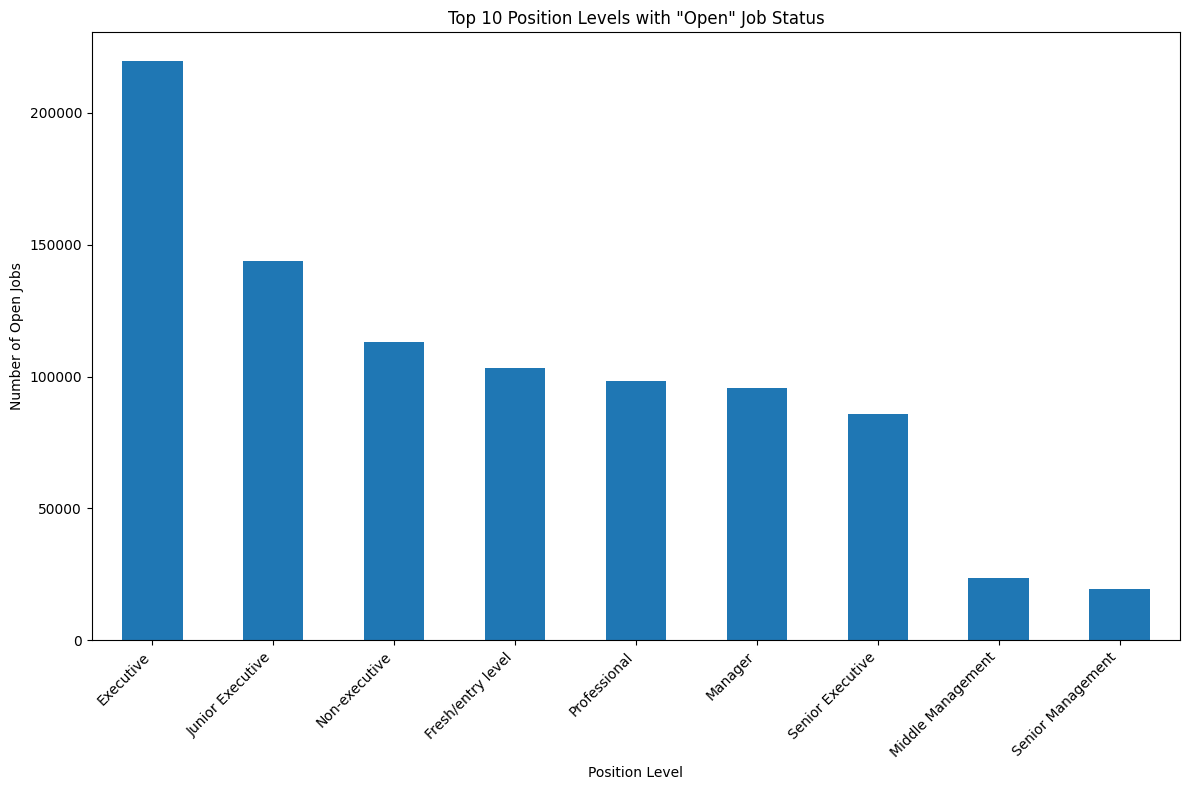

In [ ]:
import matplotlib.pyplot as plt

# Filter for jobs with status "Open"
open_jobs_df = df[df['status_jobStatus'] == 'Open']

# Count the occurrences of each position level in open jobs
open_position_counts = open_jobs_df['positionLevels'].value_counts()

# Select the top N position levels to plot (e.g., top 10)
top_n_open_positions = open_position_counts.head(10)

# Plot the bar chart for the top open position levels
plt.figure(figsize=(12, 8))
top_n_open_positions.plot(kind='bar')
plt.title('Top 10 Position Levels with "Open" Job Status')
plt.xlabel('Position Level')
plt.ylabel('Number of Open Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

🏙️ 4. Regional Labor Market Insights Scenario: “A policy maker wants to understand which cities or regions have the most job growth and which are declining.”

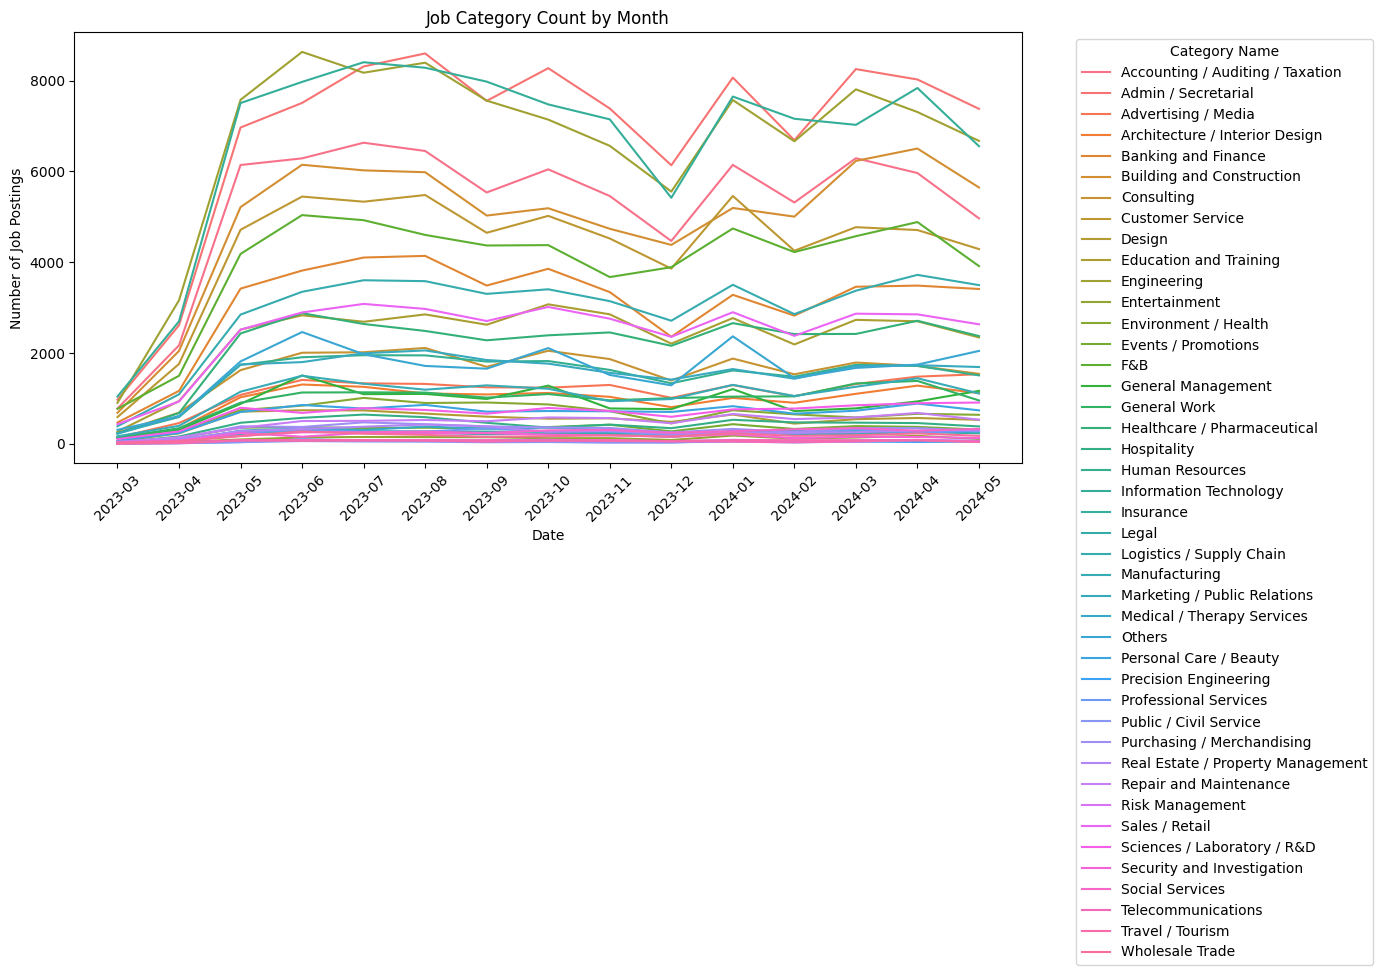

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'posting_month_year' to string for plotting
job_trends['posting_month_year'] = job_trends['posting_month_year'].astype(str)

# Plot the job trends for each category over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=job_trends, x='posting_month_year', y='job_count', hue='category_name')
plt.title('Job Category Count by Month')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.legend(title='Category Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

🤖 5. Job Recommendation or Career Path Modeling Scenario: “You work at a career platform and want to recommend jobs based on user skills.”

🤖 5. Job Recommendation or Career Path Modeling Scenario: “You work at a career platform and want to recommend jobs based on user skills.”

🤖 5. Job Recommendation or Career Path Modeling Scenario: “You work at a career platform and want to recommend jobs based on user skills.”

🤖 5. Job Recommendation or Career Path Modeling Scenario: “You work at a career platform and want to recommend jobs based on user skills.”